In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [3]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170498071/170498071 [==============================] - 38s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [4]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [23]:
x_train[0].shape

(32, 32, 3)

In [5]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 11s 5ms/step - loss: 1.5661 - accuracy: 0.4275 - val_loss: 1.2947 - val_accuracy: 0.5258
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2905 - accuracy: 0.5349 - val_loss: 1.1567 - val_accuracy: 0.5885
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1636 - accuracy: 0.5841 - val_loss: 1.0416 - val_accuracy: 0.6324
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0654 - accuracy: 0.6210 - val_loss: 0.9948 - val_accuracy: 0.6486
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9985 - accuracy: 0.6441 - val_loss: 0.9800 - val_accuracy: 0.6588
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9524 - accuracy: 0.6623 - val_loss: 0.9701 - val_accuracy: 0.6603
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8921 - accuracy: 0.6809 - val_loss: 0.9404 - val_accuracy

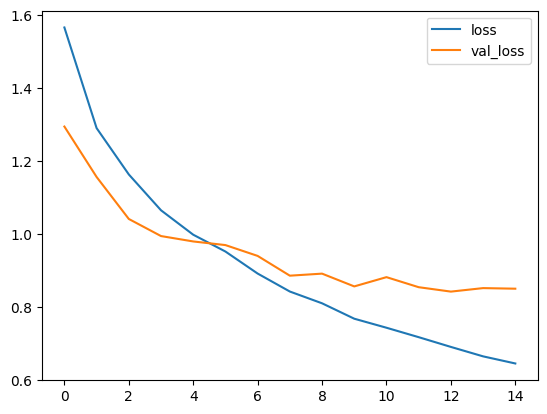

In [7]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

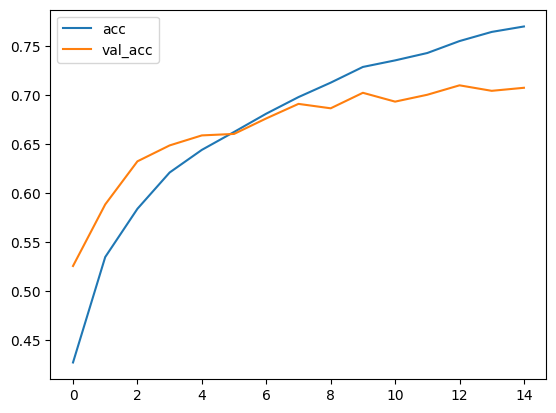

In [8]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[775  21  21  17  14   8  15   8  76  45]
 [ 16 824   3   7   1  13  11   2  19 104]
 [ 91   9 509  71  93  95  81  26  18   7]
 [ 26  14  41 464  70 236  88  31  14  16]
 [ 29   4  54  74 637  52  73  64   8   5]
 [ 14   7  29 135  50 683  31  38  10   3]
 [ 11   7  28  47  26  43 824   3   8   3]
 [ 16   4  18  36  57  78  11 751   5  24]
 [ 56  45   7  10  10   6   7   3 824  32]
 [ 39  91   4  16   7  12  11  10  28 782]]


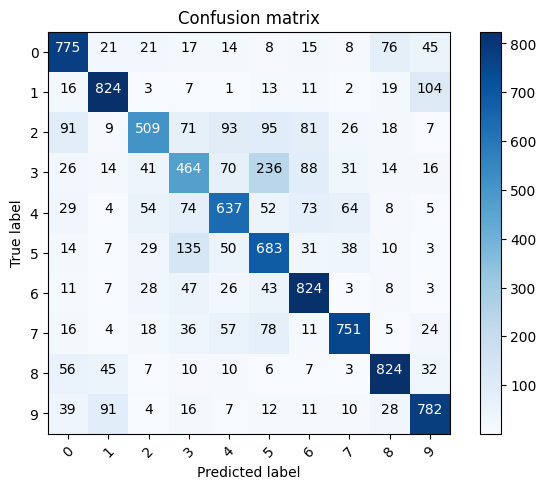

In [9]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [10]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

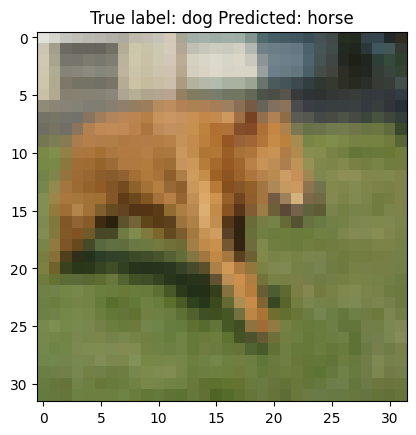

In [22]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));